In [1]:
# Her er de ændringer jeg har lavet/skal laves:

# 1) Har fjernet set.style fra første celle
# 2) Har indsat en chunk kode i cellen nedenunder, som ændrer fonten til LaTeX font 
# 3) Indsæt gridlines i alle plots. Gør det med følgende:
# ax.grid(alpha = 0.5)
# ax.set_axisbelow(True)
# 4) Ovenstående er gjort/skal gøres for det andet dokument også
# 5) Har lavet en filepath, så vi let kan gemme figurerne et sted
# Der er dog et problem - vores subplots med fx 10 histogrammer er gigantiske store - hvis det skal passe ind i LaTeX dokumentet,
# så skal vi skalere det så meget ned, at teksten i plotsene bliver meget lille. Er nok nødt til at gøre intervaller for akser
# mindst muligt
# 6) OBS! Hvis der fx står "%" i figuren, så forstår Python det ikke efter font ændring - du skal skrive \% i figurer  
# - så virker det
# 7) For at gemme figur, skriv plt.savefig(filepath + "\\FigurNavn.pdf") - så lagres den i mappen "Figurer"
# Den kan godt give en bug, når figurer laves - men fonten ændres alligevel
# 8) Til slut har jeg indsat pd.set_option(...) i begge dokumenter, så vi nemt kan kopiere DataFrames til LaTeX med 4 decimaler

In [2]:
import sys
sys.path.insert(0,"C:\\Coding\\Local_repositories\\Exammmmm\\")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import optimize

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

filepath = "C:\\Coding\\Local_repositories\\Exammmmm\\Figures"

# pd.set_option('display.float_format', '{:.4f}'.format) # 4 decimals are shown in pandas DataFrames

from codelib.visualization.base import fan_chart
from codelib.portfolio_optimization.views import weighted_percentile

# Optimizing portfolios

In [3]:
# Load data

asset = {}

for i in range(1, 11):
    asset[i] = pd.read_csv("C:\\Coding\\Local_repositories\\Exammmmm\\ExamData\\asset_{}.csv".format(i), index_col = 0).transpose()

In [4]:
# Linear and cumulative returns and log returns

lin_ret = {}
cum_lin_ret = {}
log_ret = {}
cum_log_ret = {}

for i in asset:
    lin_ret[i] = asset[i][:] / asset[i][:].shift(1) - 1
    cum_lin_ret[i] = (lin_ret[i] + 1).cumprod() - 1
    log_ret[i] = np.log(asset[i][:] / asset[i][:].shift(1))
    cum_log_ret[i] = log_ret[i].cumsum()

In [5]:
# Descriptive stats 1 year horizon

horizon = 1
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "Median", "95th percentile"]
oneypricedescr = pd.DataFrame(columns = columns, index = range(1, 11))
oneyretdescr = pd.DataFrame(columns = columns, index = range(1, 11))

for i, j in zip(asset, range(1, 11)):
    oneypricedescr["Mean"].loc[j] = (asset[i].iloc[horizon, :].mean())
    oneypricedescr["Standard deviation"].loc[j] = (asset[i].iloc[horizon, :].std())
    oneypricedescr["Skewness"].loc[j] = (asset[i].iloc[horizon, :].skew())
    oneypricedescr["Kurtosis"].loc[j] = (asset[i].iloc[horizon, :].kurtosis())
    oneypricedescr["5th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.05))
    oneypricedescr["Median"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.5))
    oneypricedescr["95th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.95))
    oneyretdescr["Mean"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].mean())
    oneyretdescr["Standard deviation"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].std())
    oneyretdescr["Skewness"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].skew())
    oneyretdescr["Kurtosis"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].kurtosis())
    oneyretdescr["5th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.05))
    oneyretdescr["Median"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.5))
    oneyretdescr["95th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.95))   
print(oneypricedescr.to_latex())
print(oneyretdescr.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &      Mean & Standard deviation &  Skewness &  Kurtosis & 5th percentile &    Median & 95th percentile \\
\midrule
1  &  1.092798 &           0.189981 &  0.160498 &  0.285135 &       0.784331 &  1.088662 &        1.412145 \\
2  &  1.095515 &           0.192603 &  0.185659 &  0.265471 &       0.787527 &  1.092155 &        1.421149 \\
3  &  1.091915 &           0.191742 &  0.197202 &   0.23909 &       0.782972 &  1.087058 &        1.409817 \\
4  &  1.085131 &            0.18128 &  0.158357 &  0.394116 &        0.78924 &  1.080302 &        1.389107 \\
5  &  1.070206 &           0.153326 &  0.040871 &  0.344938 &       0.814935 &  1.069465 &        1.321808 \\
6  &  1.063204 &           0.140139 & -0.075311 &  0.338187 &       0.827722 &  1.064525 &         1.29009 \\
7  &  1.061836 &           0.140387 & -0.066703 &  0.308762 &       0.823161 &  1.065459 &         1.28449 \\
8  &  1.056576 &           0.127525 & -0.133624 &  0.365465 &       0.839421

In [6]:
# Descriptive stats 5 year horizon

horizon = 5
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "Median", "95th percentile"]
fiveypricedescr = pd.DataFrame(columns = columns, index = range(1, 11))
fiveyretdescr = pd.DataFrame(columns = columns, index = range(1, 11))

for i, j in zip(asset, range(1, 11)):
    fiveypricedescr["Mean"].loc[j] = (asset[i].iloc[horizon, :].mean())
    fiveypricedescr["Standard deviation"].loc[j] = (asset[i].iloc[horizon, :].std())
    fiveypricedescr["Skewness"].loc[j] = (asset[i].iloc[horizon, :].skew())
    fiveypricedescr["Kurtosis"].loc[j] = (asset[i].iloc[horizon, :].kurtosis())
    fiveypricedescr["5th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.05))
    fiveypricedescr["Median"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.5))
    fiveypricedescr["95th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.95))
    fiveyretdescr["Mean"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].mean())
    fiveyretdescr["Standard deviation"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].std())
    fiveyretdescr["Skewness"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].skew())
    fiveyretdescr["Kurtosis"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].kurtosis())
    fiveyretdescr["5th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.05))
    fiveyretdescr["Median"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.5))
    fiveyretdescr["95th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.95))   
print(fiveypricedescr.to_latex())
print(fiveyretdescr.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &      Mean & Standard deviation &  Skewness &  Kurtosis & 5th percentile &    Median & 95th percentile \\
\midrule
1  &  1.544342 &           0.630468 &  1.052919 &  1.880734 &       0.711896 &   1.44375 &        2.709996 \\
2  &  1.544306 &           0.629056 &  1.106931 &   2.42783 &       0.711857 &  1.445768 &        2.709659 \\
3  &  1.535913 &           0.618368 &  1.094611 &   2.25201 &       0.726861 &  1.437324 &        2.696267 \\
4  &  1.489003 &           0.569249 &  0.991692 &  1.810616 &       0.717818 &  1.406876 &        2.549393 \\
5  &  1.390207 &           0.455167 &  0.809633 &   1.42071 &       0.750819 &  1.336627 &        2.217411 \\
6  &  1.348795 &           0.410607 &  0.742998 &  1.121342 &       0.759814 &  1.304559 &         2.07698 \\
7  &  1.342453 &           0.406595 &  0.743284 &  1.245541 &       0.761049 &  1.298617 &        2.069306 \\
8  &  1.307352 &           0.364608 &   0.55645 &  0.515262 &       0.771279

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


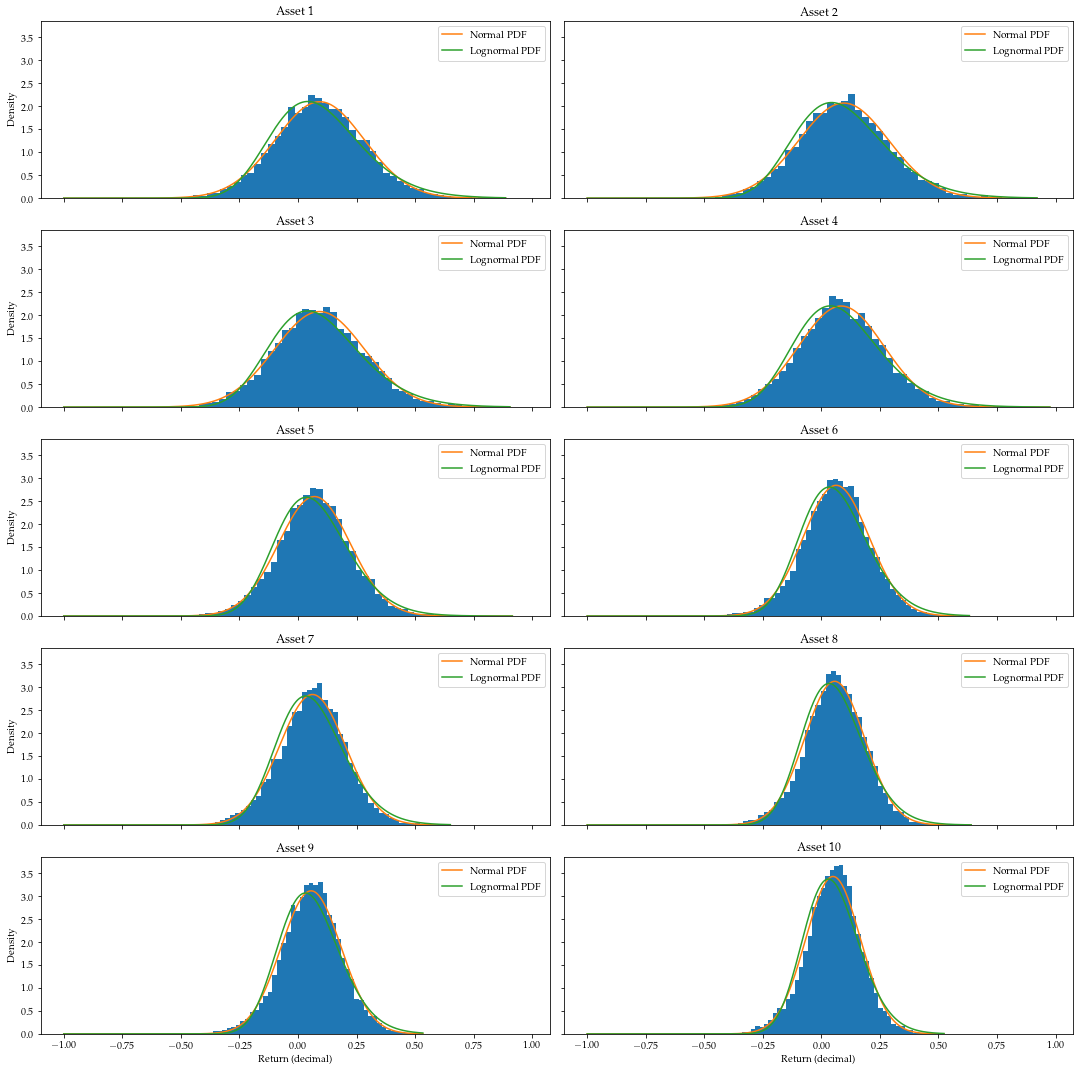

In [7]:
# 1 year return distributions

horizon = 1
bins = 50

fig, ax = plt.subplots(5, 2, figsize = (15, 15), sharex = True, sharey = True)
order_one = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
order_two = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

for j, k, i in zip(order_one, order_two, range(1, 11)):
    x = np.linspace(start = -1, stop = cum_lin_ret[i].iloc[horizon, :].max(), num = 1000)
    ax[j][k].hist(cum_lin_ret[i].iloc[horizon, :], bins = bins, density = True)
    ax[j][k].plot(x, stats.norm.pdf(x, loc = cum_lin_ret[i].iloc[horizon, :].mean(), scale = cum_lin_ret[i].iloc[horizon, :].std()), label = "Normal PDF")
    ax[j][k].plot(x, stats.lognorm.pdf(x + 1, scale = np.exp(cum_log_ret[i].iloc[horizon, :].mean()), s = cum_log_ret[i].iloc[horizon, :].std()), label = "Lognormal PDF")
    
    ax[j][k].set_title("Asset {}".format(i))
    ax[j][k].legend()

ax[4][0].set_xlabel("Return (decimal)") 
ax[4][1].set_xlabel("Return (decimal)")     
    
ax[0][0].set_ylabel("Density")
ax[1][0].set_ylabel("Density") 
ax[2][0].set_ylabel("Density") 
ax[3][0].set_ylabel("Density") 
ax[4][0].set_ylabel("Density") 

plt.tight_layout()
plt.show()

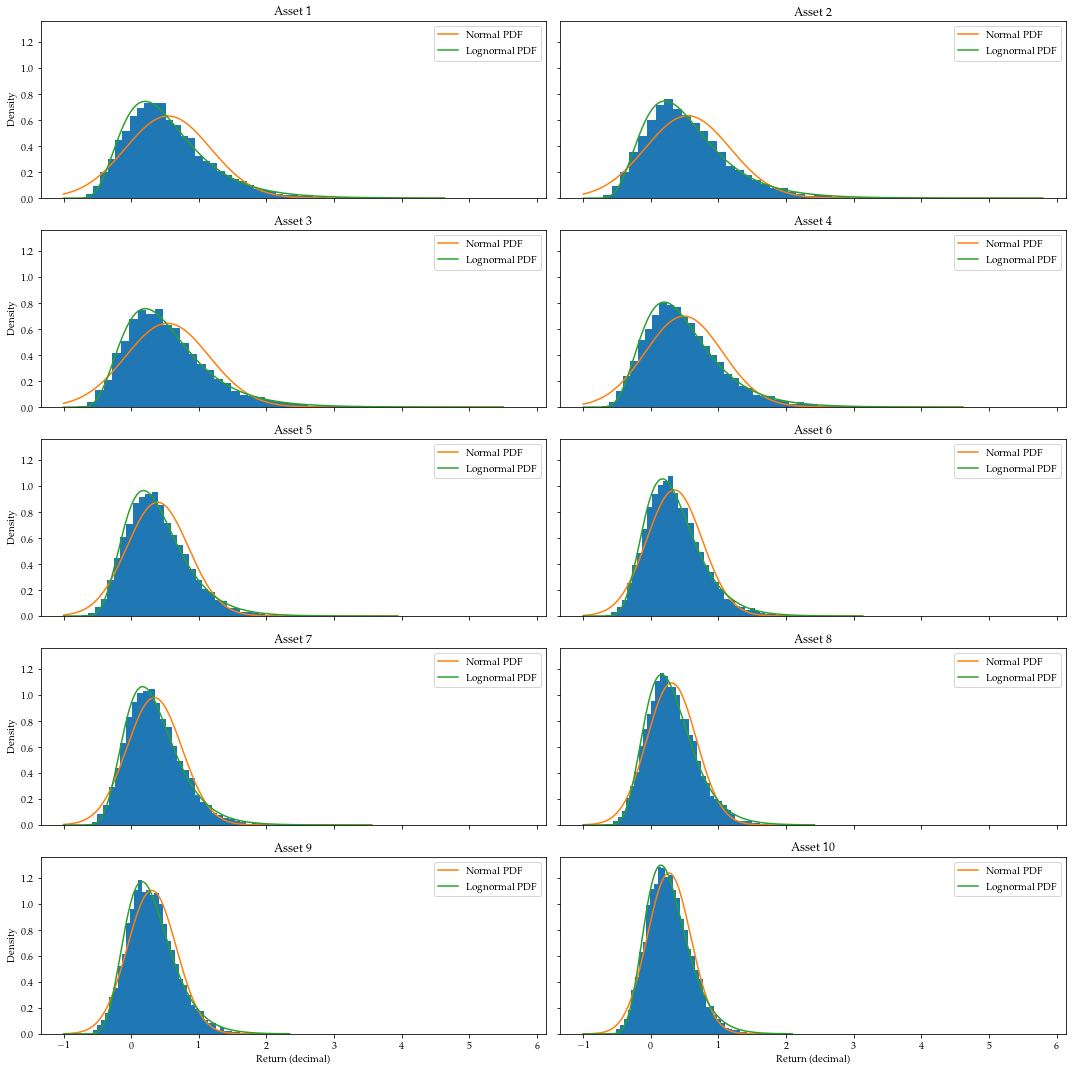

In [8]:
# 5 year return distributions

horizon = 5
lims = [-0.75, 0.75]
bins = 50

fig, ax = plt.subplots(5, 2, figsize = (15, 15), sharex = True, sharey = True)
order_one = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
order_two = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

for j, k, i in zip(order_one, order_two, range(1, 11)):
    x = np.linspace(start = -1, stop = cum_lin_ret[i].iloc[horizon, :].max(), num = 1000)
    ax[j][k].hist(cum_lin_ret[i].iloc[horizon, :], bins = bins, density = True)
    ax[j][k].plot(x, stats.norm.pdf(x, loc = cum_lin_ret[i].iloc[horizon, :].mean(), scale = cum_lin_ret[i].iloc[horizon, :].std()), label = "Normal PDF")
    ax[j][k].plot(x, stats.lognorm.pdf(x + 1, scale = np.exp(cum_log_ret[i].iloc[horizon, :].mean()), s = cum_log_ret[i].iloc[horizon, :].std()), label = "Lognormal PDF")
    
    ax[j][k].set_title("Asset {}".format(i))
    ax[j][k].legend()

ax[4][0].set_xlabel("Return (decimal)") 
ax[4][1].set_xlabel("Return (decimal)")     
    
ax[0][0].set_ylabel("Density")
ax[1][0].set_ylabel("Density") 
ax[2][0].set_ylabel("Density") 
ax[3][0].set_ylabel("Density") 
ax[4][0].set_ylabel("Density") 

plt.tight_layout()
plt.show()

In [9]:
# Equally weighted

pf_ew_ret = (lin_ret[1] + lin_ret[2] + lin_ret[3] + lin_ret[4] + lin_ret[5] + lin_ret[6] + lin_ret[7] + lin_ret[8] + lin_ret[9] + lin_ret[10]) / len(lin_ret)
pf_ew_price = ((pf_ew_ret + 1).cumprod() - 1).fillna(0) + 1
pf_ew_price_np = pf_ew_price.to_numpy()

# Buy and hold

pf_bh_price = (asset[1] + asset[2] + asset[3] + asset[4] + asset[5] + asset[6] + asset[7] + asset[8] + asset[9] + asset[10]) / len(asset)
pf_bh_price_np = pf_bh_price.to_numpy()

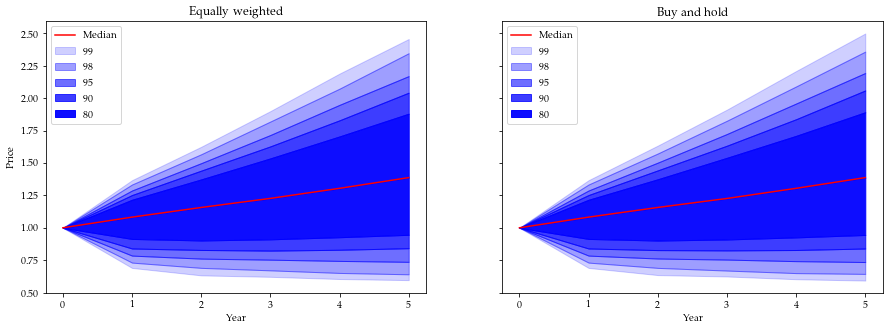

In [10]:
# Plot of prices

x = np.linspace(0, 5, 6)

percentiles_pf_ew_price_np = np.percentile(pf_ew_price_np, [0.5, 1.0, 2.5, 5, 10, 50, 90, 95, 97.5, 99.0, 99.5], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharex = True, sharey = True)

fan_chart(x,
          percentiles_pf_ew_price_np,
          labels=['99% CI', '98% CI', '95% CI', '90% CI', '80% CI', 'Median'],
          ax = ax[0])

ax[0].set_xlabel("Year")
ax[0].set_ylabel("Price")
ax[0].set_title("Equally weighted")

ax[0].legend(loc='upper left');

percentiles_pf_bh_price_np = np.percentile(pf_bh_price_np, [0.5, 1.0, 2.5, 5, 10, 50, 90, 95, 97.5, 99.0, 99.5], axis=1)

fan_chart(x,
          percentiles_pf_bh_price_np,
          labels=['99% CI', '98% CI', '95% CI', '90% CI', '80% CI', 'Median'],
          ax = ax[1])

ax[1].set_xlabel("Year")

ax[1].set_title("Buy and hold")

ax[1].legend(loc='upper left');

In [11]:
# Equally weighted returns and cumulative returns

pf_ew_ret = pf_ew_price / pf_ew_price.shift(1) - 1
pf_ew_cum_ret = (1 + pf_ew_ret).cumprod() - 1

# Buy and hold returns and cumulative returns

pf_bh_ret = pf_bh_price / pf_bh_price.shift(1) - 1
pf_bh_cum_ret = (1 + pf_bh_ret).cumprod() - 1

In [12]:
# 1 year portfolio returns descriptive statistics for both EW and BH

horizon = 1
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "95% VaR", "95% CVaR"]
index = ["EW", "BH"]
oneypfdescr = pd.DataFrame(columns = columns, index = index)

# Equally weighted

oneypfdescr["Mean"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].mean()
oneypfdescr["Standard deviation"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].std()
oneypfdescr["Skewness"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].skew()
oneypfdescr["Kurtosis"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].kurtosis()
oneypfdescr["95% VaR"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)
oneypfdescr["95% CVaR"].loc["EW"] = np.mean(pf_ew_cum_ret.iloc[horizon, :][pf_ew_cum_ret.iloc[horizon, :] <= pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)])

# Buy and hold

oneypfdescr["Mean"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].mean()
oneypfdescr["Standard deviation"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].std()
oneypfdescr["Skewness"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].skew()
oneypfdescr["Kurtosis"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].kurtosis()
oneypfdescr["95% VaR"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)
oneypfdescr["95% CVaR"].loc["BH"] = np.mean(pf_bh_cum_ret.iloc[horizon, :][pf_bh_cum_ret.iloc[horizon, :] <= pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)])

In [13]:
oneypfdescr

,Mean,Standard deviation,Skewness,Kurtosis,95% VaR,95% CVaR
EW,0.072314,0.122671,-0.530503,0.808981,-0.159746,-0.229001
BH,0.072314,0.122671,-0.530503,0.808981,-0.159746,-0.229001


In [14]:
# 5 year portfolio returns descriptive statistics for both EW and BH

horizon = 5
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "95% VaR", "95% CVaR"]
index = ["EW", "BH"]
fiveypfdescr = pd.DataFrame(columns = columns, index = index)

# Equally weighted

fiveypfdescr["Mean"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].mean()
fiveypfdescr["Standard deviation"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].std()
fiveypfdescr["Skewness"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].skew()
fiveypfdescr["Kurtosis"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].kurtosis()
fiveypfdescr["95% VaR"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)
fiveypfdescr["95% CVaR"].loc["EW"] = np.mean(pf_ew_cum_ret.iloc[horizon, :][pf_ew_cum_ret.iloc[horizon, :] <= pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)])

# Buy and hold

fiveypfdescr["Mean"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].mean()
fiveypfdescr["Standard deviation"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].std()
fiveypfdescr["Skewness"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].skew()
fiveypfdescr["Kurtosis"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].kurtosis()
fiveypfdescr["95% VaR"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)
fiveypfdescr["95% CVaR"].loc["BH"] = np.mean(pf_bh_cum_ret.iloc[horizon, :][pf_bh_cum_ret.iloc[horizon, :] <= pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)])

In [15]:
fiveypfdescr

,Mean,Standard deviation,Skewness,Kurtosis,95% VaR,95% CVaR
EW,0.404248,0.367125,0.382258,0.409362,-0.157566,-0.27926
BH,0.407453,0.372615,0.41841,0.46775,-0.159927,-0.279982


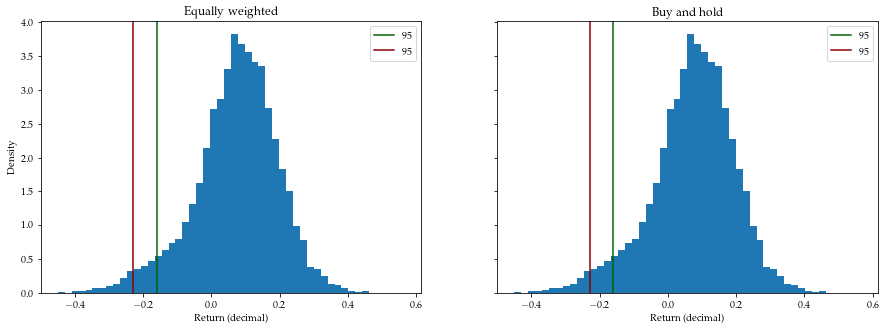

In [16]:
# 1 year portfolio returns distributions for both EW and BH

horizon = 1
bins = 50

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex = True, sharey = True)

ax[0].hist(pf_ew_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[0].axvline(oneypfdescr["95% VaR"].loc["EW"], label = "95% VaR", color = "darkgreen")
ax[0].axvline(oneypfdescr["95% CVaR"].loc["EW"], label = "95% CVaR", color = "darkred")
ax[0].set_title("Equally weighted")
ax[0].legend()

ax[1].hist(pf_bh_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[1].axvline(oneypfdescr["95% VaR"].loc["BH"], label = "95% VaR", color = "darkgreen")
ax[1].axvline(oneypfdescr["95% CVaR"].loc["BH"], label = "95% CVaR", color = "darkred")
ax[1].set_title("Buy and hold")
ax[1].legend()

ax[0].set_xlabel("Return (decimal)") 
ax[1].set_xlabel("Return (decimal)")        
ax[0].set_ylabel("Density")

plt.show()

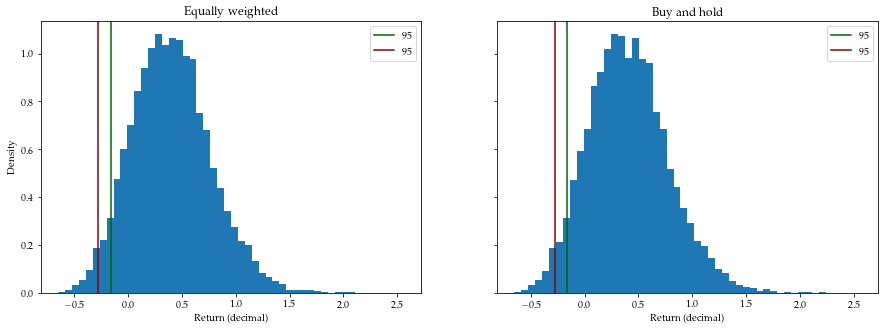

In [17]:
# 5 year portfolio returns distributions for both EW and BH

horizon = 5
bins = 50

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex = True, sharey = True)

ax[0].hist(pf_ew_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[0].axvline(fiveypfdescr["95% VaR"].loc["EW"], label = "95% VaR", color = "darkgreen")
ax[0].axvline(fiveypfdescr["95% CVaR"].loc["EW"], label = "95% CVaR", color = "darkred")
ax[0].set_title("Equally weighted")
ax[0].legend()

ax[1].hist(pf_bh_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[1].axvline(fiveypfdescr["95% VaR"].loc["BH"], label = "95% VaR", color = "darkgreen")
ax[1].axvline(fiveypfdescr["95% CVaR"].loc["BH"], label = "95% CVaR", color = "darkred")
ax[1].set_title("Buy and hold")
ax[1].legend()

ax[0].set_xlabel("Return (decimal)") 
ax[1].set_xlabel("Return (decimal)")        
ax[0].set_ylabel("Density")

plt.show()

In [18]:
# We convert the dictionary into a 3D numpy array

cum_lin_ret_np = np.array(list(cum_lin_ret.values())).T

## Optimal portfolio weights (buy and hold) 

In [19]:
# Minimization of standard deviation

# Objective function

def OptPFWeightsMinStd(w: np.array, horizon: int, cum_lin_ret_np: np.array):
    """Finds standard deviation of the returns of a buy and hold portfolio for a given horizon"""
    pf_return = (cum_lin_ret_np @ w).T
    return pf_return[horizon, :].std(ddof=1)

# Minimization of CVaR

# Objective function

def OptPFWeightsMinCVaR(w: np.array, horizon: int, cum_lin_ret_np: np.array, alpha: int = 95):
    """Finds CVaR of the returns of a buy and hold portfolio for a given horizon"""
    pf_return = (cum_lin_ret_np @ w).T
    return -np.mean(pf_return[horizon, :][pf_return[horizon, :] <= np.percentile(pf_return[horizon, :], (100 - alpha))])

# Minimization of CVaR using Rockafeller and Uryasev (2000) approach

# Objective function

def OptPFWeightsRockafellerCVaR(x: np.array, horizon: int, cum_lin_ret_np: np.array, beta: int = 0.95):

    w = x[0:-1]
    alpha = x[-1]
    
    pf_return = (cum_lin_ret_np @ w).T
    
    tail_scenarios = np.maximum(-pf_return[horizon, :] - alpha, 0.0)
    
    obj_func = alpha + np.sum(tail_scenarios) / (len(pf_return.T)*(1-beta)) 
    
    return obj_func

### 1 year horizon

In [20]:
# Constraints

target = 0.08

def cons_1(w):
    return np.sum(w) - 1

def cons_2(w, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target

In [21]:
# Minimizing objective function (standard deviation) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwstdoney = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwstdoney.x.round(4)

array([0.1145, 0.186 , 0.1068, 0.1779, 0.1637, 0.0633, 0.1067, 0.0183,
       0.0628, 0.    ])

In [22]:
# Minimizing objective function (CVaR) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwcvaroney = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwcvaroney.x.round(4)

array([0.    , 0.2435, 0.1194, 0.2472, 0.1866, 0.    , 0.0376, 0.0169,
       0.1489, 0.    ])

#### 1 year horizon Rockafeller and Uryasev (2000) CVaR implemented separately

In [23]:
# Rockafeller CVaR constraints (specified in the same way as those above)

target = 0.08

def cons_1(x):
    return np.sum(x[:-1]) - 1

def cons_2(x, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target

In [24]:
# Minimizing objective function (Rockafeller CVaR) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
args = (horizon, cum_lin_ret_np, 0.95) # Exogenous input
x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwrockafoney = optimize.minimize(fun = OptPFWeightsRockafellerCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwrockafoney.x.round(4)

array([0.    , 0.2466, 0.122 , 0.2416, 0.1841, 0.    , 0.0337, 0.0206,
       0.1513, 0.    , 0.1662])

In [25]:
# Very similar portfolios weights compared to the standard CVaR minimization approach

### 5 year horizon

In [26]:
# Constraints

target = 0.45

def cons_1(w):
    return np.sum(w) - 1

def cons_2(w, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target

In [27]:
# Minimizing objective function (standard deviation) w.r.t. weights with target return 45%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwstdfivey = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwstdfivey.x.round(4)

array([0.0832, 0.14  , 0.1405, 0.1922, 0.1922, 0.0599, 0.1293, 0.    ,
       0.0627, 0.    ])

In [28]:
# Minimizing objective function (CVaR) w.r.t. weights with target return 45%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwcvarfivey = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwcvarfivey.x.round(4)

array([0.    , 0.1267, 0.2317, 0.223 , 0.1904, 0.0124, 0.1125, 0.    ,
       0.0828, 0.0205])

#### 5 year horizon Rockafeller and Uryasev (2000) CVaR implemented separately

In [29]:
# Rockafeller CVaR constraints (specified in the same way as those above)

target = 0.45

def cons_1(x):
    return np.sum(x[:-1]) - 1

def cons_2(x, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target

In [30]:
# Minimizing objective function (Rockafeller CVaR) w.r.t. weights with target return 8%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
args = (horizon, cum_lin_ret_np, 0.95) # Exogenous input
x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwrockaffivey = optimize.minimize(fun = OptPFWeightsRockafellerCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwrockaffivey.x.round(4)

array([0.    , 0.1268, 0.2316, 0.2233, 0.19  , 0.0125, 0.1127, 0.    ,
       0.082 , 0.0212, 0.1648])

In [31]:
# Very similar portfolios weights compared to the standard CVaR minimization approach

# Plotting the optimal portfolio weights

### 1 year horizon

In [32]:
# One year optimal portfolio weights for different targets return, minimizing standard deviation

targets = np.linspace(0.05, 0.09, 21)
opt_weight_std_one_year = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (standard deviation) w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwstdoney = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwstdoney.x.round(4)
    
    opt_weight_std_one_year.append(optwstdoney.x)

In [33]:
# One year optimal portfolio weights for different targets return, minimizing CVaR

targets = np.linspace(0.05, 0.09, 21)
opt_weight_CVaR_one_year = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (CVaR) w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwcvaroney = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwcvaroney.x.round(4)
    
    opt_weight_CVaR_one_year.append(optwcvaroney.x)

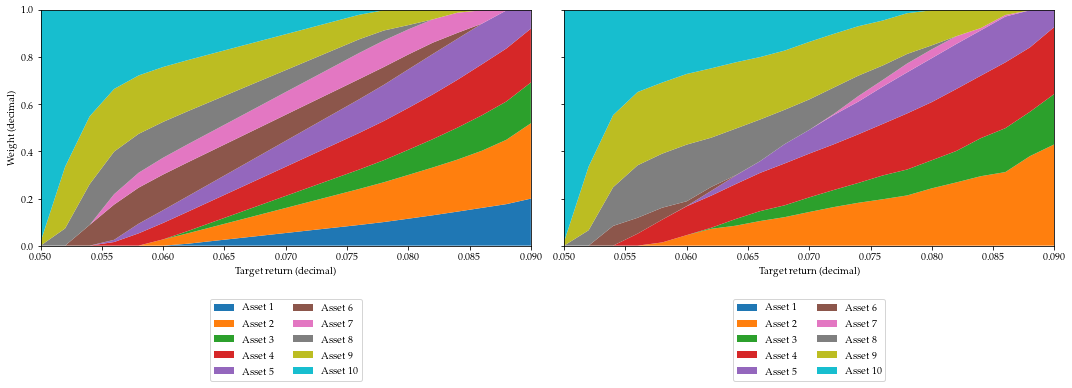

In [34]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)

ax[0].stackplot(targets, np.array(opt_weight_std_one_year).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

ax[1].stackplot(targets, np.array(opt_weight_CVaR_one_year).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

fig.tight_layout()
plt.show()

### 5 year horizon

In [35]:
# Five year optimal portfolio weights for different targets return, minimizing standard deviation

targets = np.linspace(0.3, 0.5, 41)
opt_weight_std_five_years = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (standard deviation) w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwstdfivey = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwstdfivey.x.round(4)
    
    opt_weight_std_five_years.append(optwstdfivey.x)

In [36]:
# Five year optimal portfolio weights for different targets return, minimizing CVaR

targets = np.linspace(0.3, 0.5, 41)
opt_weight_CVaR_five_years = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (CVaR) w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwcvarfivey = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwcvarfivey.x.round(4)
    
    opt_weight_CVaR_five_years.append(optwcvarfivey.x)

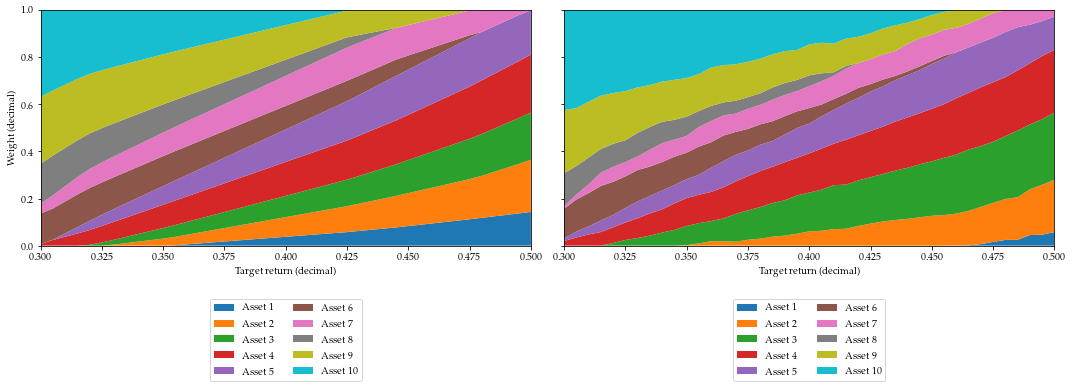

In [37]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)

ax[0].stackplot(targets, np.array(opt_weight_std_five_years).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

ax[1].stackplot(targets, np.array(opt_weight_CVaR_five_years).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

fig.tight_layout()
plt.show()

# Views according to Meucci - Fully Flexible Views: Theory and Practice

In [38]:
# Idea: We wish to maximize the Lagrangian dual function w.r.t. the Lagrangian multiplier, v.
# Once v is estimated, we can use it to calculate p_thilde - the new probabilities that make sure our view is satisfied by 
# ultimately changing the prior distribution so that we obtain a posterior distribution, which 1) satisfies our view while 2)
# also being as similar to the prior distribution as possible
# The optimization problem here stems from the fact that we wish to minimize the relative entropy, i.e., the difference between
# the prior and posterior distributions
# When p tilde changes, it corresponds to a change in the FREQUENCY of a given return/price - not the size of the actual 
# return/price

# Function to calculate the new probabilities

def calculate_p_tilde(v, p, H_matrix):
    
    temp = np.log(p) - 1.0 - np.transpose(H_matrix) @ v
    
    return np.exp(temp)

# Lagrangian dual function that we wish to optimize w.r.t. v (Lagrangian multiplier)
# This is a Lagrandian *dual* function, because we let x be a function of the Lagrangian multiplier, v, in the sense that
# x is defined in terms of the function 'calculate_p_tilde', which is a function of v

def lagrangian_dual_function(v, p, H_matrix, h_vector):
    
    x = calculate_p_tilde(v, p, H_matrix)
    x = np.maximum(x, 10 ** (-32))
    
    lagrangian = x.T @ (np.log(x) - np.log(p)) + v @ (H_matrix @ x - h_vector)
    
    return -lagrangian

### 1 year horizon: Asset 1 (5% to 0.85), asset 2 (50% to 1.13), asset 6 (5% to 0.9), asset 10 (5% to 0.9)

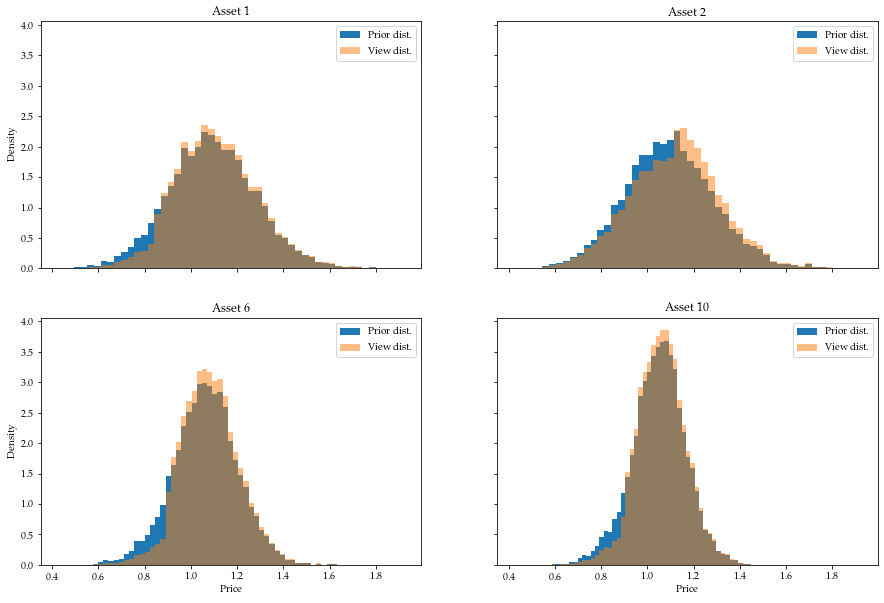

In [39]:
# H matrix specifies the linear equality constraints
# We add the constraint that the weights need to sum to one 

horizon = 1 # Horizon 1 or 5
num_sim = 10000 # 10,000 simulations per asset
init_probs = np.array([1 / num_sim] * num_sim) # Initial probabilities

which_asset = [1, 2, 6, 10] # Which asset we apply a view on
which_quantile = [0.05, 0.5, 0.05, 0.05] # The quantile of interest
target_for_quantile = [0.85, 1.13, 0.9, 0.9] # The target value we set for the quantile

p_tilde_oney = dict()

order_one = [0, 0, 1, 1]
order_two = [0, 1, 0, 1]

fig, ax = plt.subplots(2, 2, figsize = (15,10), sharex = True, sharey = True)

for i, j, k, l, m in zip(which_asset, which_quantile, target_for_quantile, order_one, order_two):
    
    bool_vector = np.array((asset[i].iloc[horizon, :] < k) * 1) # Vector of 1's and 0's
    H_matrix = np.vstack((np.ones(num_sim), bool_vector)) # Linear equality constraints
    h_vector = np.array([1.0, j]) # Weights add to 1, view on the quantile of interest

    # Maximize Lagrangian dual 
    # x0 are the start values for the Lagrangian multipliers in vector v

    res = optimize.minimize(fun = lagrangian_dual_function, x0 = [0.0, 0.0], args = (init_probs, H_matrix, h_vector))

    # Calculate p tilde, i.e., the probabilities that makes the posterior distribution satisfy our view(s) while preserving as much
    # of the structure of the prior distribution

    p_tilde_oney[i] = calculate_p_tilde(res.x, init_probs, H_matrix)
    
    # Plotting asset distributions
    
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, density = True, label = "Prior dist.")
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, weights = p_tilde_oney[i], density = True, alpha = 0.5, label = "View dist.")

    ax[l, m].set_title("Asset {}".format(i))
    ax[l, m].legend()

ax[1, 0].set_xlabel('Price')    
ax[1, 1].set_xlabel('Price')        
ax[0, 0].set_ylabel('Density')    
ax[1, 0].set_ylabel('Density') 

plt.show()    

In [40]:
# It does not make sense to plot a histogram of asset prices multiplied by their respective p-thilde probabilities. The reason
# is that then we are plotting the weighted asset values - which is dissimilar to plotting the asset values with NEW frequencies.


### 5 year horizon: Asset 2 (95% to 2.2), asset 3 (95% to 2.2), asset 8 (5% to 1), asset 10 (5% to 1)

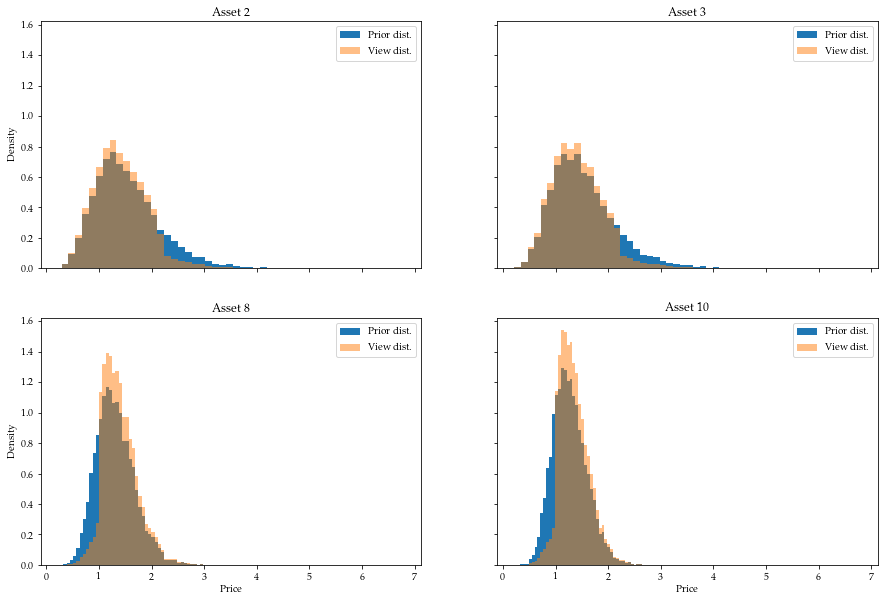

In [41]:
# H matrix specifies the linear equality constraints
# We add the constraint that the weights need to sum to one 

horizon = 5 # Horizon 1 or 5
num_sim = 10000 # 10,000 simulations per asset
init_probs = np.array([1 / num_sim] * num_sim) # Initial probabilities

which_asset = [2, 3, 8, 10] # Which asset we apply a view on
which_quantile = [0.95, 0.95, 0.05, 0.05] # The quantile of interest
target_for_quantile = [2.2, 2.2, 1, 1] # The target value we set for the quantile

p_tilde_fivey = dict()

order_one = [0, 0, 1, 1]
order_two = [0, 1, 0, 1]

fig, ax = plt.subplots(2, 2, figsize = (15,10), sharex = True, sharey = True)

for i, j, k, l, m in zip(which_asset, which_quantile, target_for_quantile, order_one, order_two):
    
    bool_vector = np.array((asset[i].iloc[horizon, :] < k) * 1) # Vector of 1's and 0's
    H_matrix = np.vstack((np.ones(num_sim), bool_vector)) # Linear equality constraints
    h_vector = np.array([1.0, j]) # Weights add to 1, view on the quantile of interest

    # Maximize Lagrangian dual 
    # x0 are the start values for the Lagrangian multipliers in vector v

    res = optimize.minimize(fun = lagrangian_dual_function, x0 = [0.0, 0.0], args = (init_probs, H_matrix, h_vector))

    # Calculate p tilde, i.e., the probabilities that makes the posterior distribution satisfy our view(s) while preserving as much
    # of the structure of the prior distribution

    p_tilde_fivey[i] = calculate_p_tilde(res.x, init_probs, H_matrix)
    
    # Plotting asset distributions
    
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, density = True, label = "Prior dist.")
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, weights = p_tilde_fivey[i], density = True, alpha = 0.5, label = "View dist.")

    ax[l, m].set_title("Asset {}".format(i))
    ax[l, m].legend()

ax[1, 0].set_xlabel('Price')    
ax[1, 1].set_xlabel('Price')        
ax[0, 0].set_ylabel('Density')    
ax[1, 0].set_ylabel('Density') 

plt.show()    

### Summary statistics for 1-year horizon posterior distributions 

In [42]:
# Functions to calculate mean, variance, skewness and kurtosis for the posterior distributions (with weights p-thilde)

def weighted_mean(var, wts):
    """Calculates the weighted mean"""
    return np.average(var, weights=wts)

def weighted_variance(var, wts):
    """Calculates the weighted variance"""
    return np.average((var - weighted_mean(var, wts))**2, weights=wts)

def weighted_std(var, wts):
    """Calculates the weighted variance"""
    return np.sqrt(weighted_variance(var, wts))

def weighted_skew(var, wts):
    """Calculates the weighted skewness"""
    return (np.average((var - weighted_mean(var, wts))**3, weights=wts) /
            weighted_variance(var, wts)**(1.5))

def weighted_kurtosis(var, wts):
    """Calculates the weighted skewness"""
    return (np.average((var - weighted_mean(var, wts))**4, weights=wts) /
            weighted_variance(var, wts)**(2))

In [43]:
# Descriptive stats 1 year horizon posterior distributions

horizon = 1
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "Median", "95th percentile"]
posterior_1y_descr = pd.DataFrame(columns = columns, index = [1, 2, 6, 10])

for i in [1, 2, 6, 10]:
    posterior_1y_descr["Mean"].loc[i] = weighted_mean(asset[i].iloc[horizon, :], p_tilde_oney[i])  
    posterior_1y_descr["Standard deviation"].loc[i] = weighted_std(asset[i].iloc[horizon, :], p_tilde_oney[i])
    posterior_1y_descr["Skewness"].loc[i] = weighted_skew(asset[i].iloc[horizon, :], p_tilde_oney[i])
    posterior_1y_descr["Kurtosis"].loc[i] = weighted_kurtosis(asset[i].iloc[horizon, :], p_tilde_oney[i])
    posterior_1y_descr["5th percentile"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.05, p_tilde_oney[i])
    posterior_1y_descr["Median"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.5, p_tilde_oney[i])
    posterior_1y_descr["95th percentile"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.95, p_tilde_oney[i])

print(posterior_1y_descr.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &      Mean & Standard deviation &  Skewness &  Kurtosis & 5th percentile &    Median & 95th percentile \\
\midrule
1  &  1.109065 &           0.178708 &  0.293251 &  3.447427 &       0.849868 &  1.099634 &        1.416365 \\
2  &  1.120701 &           0.194303 &  0.065118 &  3.208636 &        0.79998 &  1.129969 &        1.442632 \\
6  &  1.080984 &           0.126891 &  0.118037 &  3.555356 &       0.899977 &  1.076754 &        1.295776 \\
10 &  1.061206 &           0.107027 & -0.023208 &  3.593598 &       0.900023 &  1.061273 &        1.235483 \\
\bottomrule
\end{tabular}



In [44]:
# Descriptive stats 5 year horizon posterior distributions

horizon = 5
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "Median", "95th percentile"]
posterior_5y_descr = pd.DataFrame(columns = columns, index = [2, 3, 8, 10])

for i in [2, 3, 8, 10]:
    posterior_5y_descr["Mean"].loc[i] = weighted_mean(asset[i].iloc[horizon, :], p_tilde_fivey[i])  
    posterior_5y_descr["Standard deviation"].loc[i] = weighted_std(asset[i].iloc[horizon, :], p_tilde_fivey[i])
    posterior_5y_descr["Skewness"].loc[i] = weighted_skew(asset[i].iloc[horizon, :], p_tilde_fivey[i])
    posterior_5y_descr["Kurtosis"].loc[i] = weighted_kurtosis(asset[i].iloc[horizon, :], p_tilde_fivey[i])
    posterior_5y_descr["5th percentile"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.05, p_tilde_fivey[i])
    posterior_5y_descr["Median"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.5, p_tilde_fivey[i])
    posterior_5y_descr["95th percentile"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.95, p_tilde_fivey[i])

print(posterior_5y_descr.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &      Mean & Standard deviation &  Skewness &  Kurtosis & 5th percentile &    Median & 95th percentile \\
\midrule
2  &  1.426253 &           0.511114 &  0.966961 &  6.037134 &        0.69773 &  1.378403 &        2.200007 \\
3  &   1.42527 &           0.506681 &  0.961006 &  5.847174 &       0.709936 &  1.376934 &        2.199969 \\
8  &  1.396023 &           0.326184 &  0.765892 &  4.067058 &       1.000033 &  1.347262 &        2.012242 \\
10 &  1.349405 &           0.285942 &  0.717165 &  4.045317 &       0.999988 &   1.30878 &        1.875612 \\
\bottomrule
\end{tabular}



### Portfolio optimization with views

In [45]:
# Function to calculate the new probabilities

def calculate_p_tilde(v, p, H_matrix):
    
    temp = np.log(p) - 1.0 - np.transpose(H_matrix) @ v
    
    return np.exp(temp)

# Lagrangian dual function that we wish to optimize w.r.t. v (Lagrangian multiplier)
# This is a Lagrandian *dual* function, because we let x be a function of the Lagrangian multiplier, v, in the sense that
# x is defined in terms of the function 'calculate_p_tilde', which is a function of v

def lagrangian_dual_function(v, p, H_matrix, h_vector):
    
    x = calculate_p_tilde(v, p, H_matrix)
    x = np.maximum(x, 10 ** (-32))
    
    lagrangian = x.T @ (np.log(x) - np.log(p)) + v @ (H_matrix @ x - h_vector)
    
    return -lagrangian

In [46]:
# Objective function

def OptPFWeightsRockafellerCVaRwithViews(x: np.array, horizon: int, cum_lin_ret_np: np.array, beta: int, probs: np.array):

    w = x[0:-1]
    alpha = x[-1]
    
    pf_return = (cum_lin_ret_np @ w).T
    
    tail_scenarios = np.maximum(-pf_return[horizon, :] - alpha, 0.0)
    
    obj_func = alpha + (probs @ tail_scenarios) / (1-beta)
    
    return obj_func

#### 1 year horizon

In [47]:
# matrix specifying the data to apply views on
# we add the constraint that the weights need to sum to one 

horizon = 1 # Horizon 1 or 5
num_sim = 10000 # 10,000 simulations per asset
init_probs = np.array([1 / num_sim] * num_sim) # Initial probabilities

which_asset = [1, 2, 6, 10] # Which asset we apply a view on
which_quantile = [0.05, 0.5, 0.05, 0.05] # The quantile of interest
target_for_quantile = [0.85, 1.13, 0.9, 0.9] # The target value we set for the quantile

bool_vector_one = dict()

for i, k in zip(which_asset, target_for_quantile):
    bool_vector_one[i] = np.array((asset[i].iloc[horizon, :] < k) * 1)
    
H_matrix = np.vstack((np.ones(num_sim), bool_vector_one[1], bool_vector_one[2], bool_vector_one[6], bool_vector_one[10]))
h_vector = np.array([1.0, 0.05, 0.5, 0.05, 0.05])    

# maximize dual lagrangian 
res = optimize.minimize(lagrangian_dual_function, [0.0] * len(h_vector), args = (init_probs, H_matrix, h_vector))

# calculate p tilde
p_tilde_portfolio_oney = calculate_p_tilde(res.x, init_probs, H_matrix)

In [48]:
# Optimal portfolio weights with views using Rockafeller 95% CVaR minimization and 8% target

target = 0.08

def cons_1(x):
    return np.sum(x[:-1]) - 1

def cons_2(x, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target

# Minimizing objective function (Rockafeller CVaR) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
args = (horizon, cum_lin_ret_np, 0.95, p_tilde_portfolio_oney) # Exogenous input
x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwrockaf_views_oney = optimize.minimize(fun = OptPFWeightsRockafellerCVaRwithViews, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwrockaf_views_oney.x.round(4)

array([0.0986, 0.2036, 0.1197, 0.1641, 0.1494, 0.1749, 0.    , 0.0436,
       0.0197, 0.0264, 0.0929])

#### 5 year horizon

In [49]:
# matrix specifying the data to apply views on
# we add the constraint that the weights need to sum to one 

horizon = 5 # Horizon 1 or 5
num_sim = 10000 # 10,000 simulations per asset
init_probs = np.array([1 / num_sim] * num_sim) # Initial probabilities

which_asset = [2, 3, 8, 10] # Which asset we apply a view on
which_quantile = [0.95, 0.95, 0.05, 0.05] # The quantile of interest
target_for_quantile = [2.2, 2.2, 1, 1] # The target value we set for the quantile

bool_vector_five = dict()

for i, k in zip(which_asset, target_for_quantile):
    bool_vector_five[i] = np.array((asset[i].iloc[horizon, :] < k) * 1)
    
H_matrix = np.vstack((np.ones(num_sim), bool_vector_five[2], bool_vector_five[3], bool_vector_five[8], bool_vector_five[10]))
h_vector = np.array([1.0, 0.95, 0.95, 0.05, 0.05])    

# maximize dual lagrangian 
res = optimize.minimize(lagrangian_dual_function, [0.0] * len(h_vector), args = (init_probs, H_matrix, h_vector))

# calculate p tilde
p_tilde_portfolio_fivey = calculate_p_tilde(res.x, init_probs, H_matrix)

In [50]:
# Optimal portfolio weights with views using Rockafeller 95% CVaR minimization and 45% target

target = 0.45

def cons_1(x):
    return np.sum(x[:-1]) - 1

def cons_2(x, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target

# Minimizing objective function (Rockafeller CVaR) w.r.t. weights with target return 45%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
args = (horizon, cum_lin_ret_np, 0.95, p_tilde_portfolio_fivey) # Exogenous input
x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwrockaf_views_fivey = optimize.minimize(fun = OptPFWeightsRockafellerCVaRwithViews, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwrockaf_views_fivey.x.round(4)

array([ 0.0785,  0.1892,  0.1514,  0.1583,  0.1534,  0.    ,  0.114 ,
        0.1329,  0.    ,  0.0222, -0.0239])

## Plot of asset allocation in Rockafeller 95% CVaR minimization with and without views for 1 year horizon

In [51]:
# One year optimal portfolio weights for different targets return, minimizing Rockafeller CVaR, without views

targets = np.linspace(0.05, 0.09, 21)
opt_weight_Rocka_no_views_one_year = list()

for target in targets:
    def cons_1(x):
        return np.sum(x[:-1]) - 1

    def cons_2(x, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target
    
    # Minimizing objective function w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
    args = (horizon, cum_lin_ret_np, 0.95) # Exogenous input
    x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwrockanoviewsoney = optimize.minimize(fun = OptPFWeightsRockafellerCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwrockanoviewsoney.x.round(4)
    
    opt_weight_Rocka_no_views_one_year.append(optwrockanoviewsoney.x[:-1])

In [52]:
# One year optimal portfolio weights for different targets return, minimizing Rockafeller CVaR, with views

targets = np.linspace(0.05, 0.09, 21)
opt_weight_Rocka_with_views_one_year = list()

for target in targets:
    def cons_1(x):
        return np.sum(x[:-1]) - 1

    def cons_2(x, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target
    
    # Minimizing objective function w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
    args = (horizon, cum_lin_ret_np, 0.95, p_tilde_portfolio_oney) # Exogenous input
    x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwrockawithviewsoney = optimize.minimize(fun = OptPFWeightsRockafellerCVaRwithViews, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwrockawithviewsoney.x.round(4)
    
    opt_weight_Rocka_with_views_one_year.append(optwrockawithviewsoney.x[:-1])

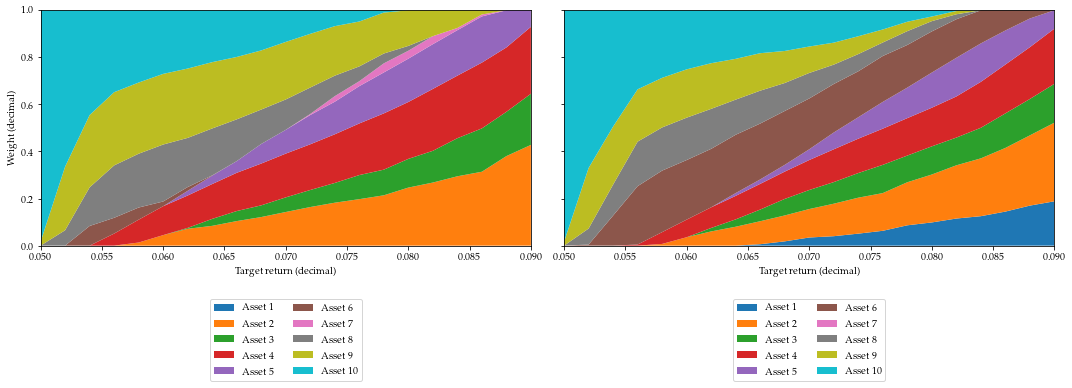

In [53]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)

# Without views
ax[0].stackplot(targets, np.array(opt_weight_Rocka_no_views_one_year).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

# With views
ax[1].stackplot(targets, np.array(opt_weight_Rocka_with_views_one_year).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

fig.tight_layout()
plt.show()

## Plot of asset allocation in Rockafeller 95% CVaR minimization with and without views for 5 year horizon

In [54]:
# Five year optimal portfolio weights for different targets return, minimizing Rockafeller CVaR, without views

targets = np.linspace(0.3, 0.5, 41)
opt_weight_Rocka_no_views_five_years = list()

for target in targets:
    def cons_1(x):
        return np.sum(x[:-1]) - 1

    def cons_2(x, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target
    
    # Minimizing objective function w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
    args = (horizon, cum_lin_ret_np, 0.95) # Exogenous input
    x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwrockanoviewsfivey = optimize.minimize(fun = OptPFWeightsRockafellerCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwrockanoviewsfivey.x.round(4)
    
    opt_weight_Rocka_no_views_five_years.append(optwrockanoviewsfivey.x[:-1])

In [55]:
# Five year optimal portfolio weights for different targets return, minimizing Rockafeller CVaR, with views

targets = np.linspace(0.3, 0.5, 41)
opt_weight_Rocka_with_views_five_years = list()

for target in targets:
    def cons_1(x):
        return np.sum(x[:-1]) - 1

    def cons_2(x, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target
    
    # Minimizing objective function w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
    args = (horizon, cum_lin_ret_np, 0.95, p_tilde_portfolio_fivey) # Exogenous input
    x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwrockawithviewsfivey = optimize.minimize(fun = OptPFWeightsRockafellerCVaRwithViews, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwrockawithviewsfivey.x.round(4)
    
    opt_weight_Rocka_with_views_five_years.append(optwrockawithviewsfivey.x[:-1])

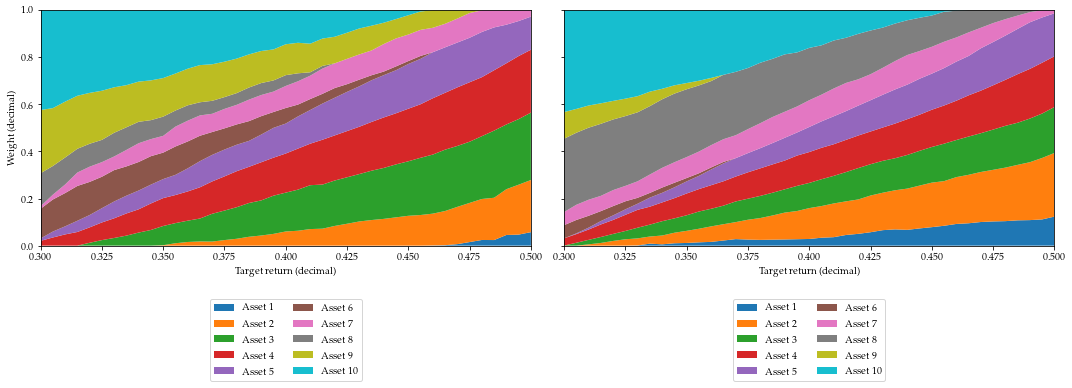

In [56]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)

# Without views
ax[0].stackplot(targets, np.array(opt_weight_Rocka_no_views_five_years).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

# With views
ax[1].stackplot(targets, np.array(opt_weight_Rocka_with_views_five_years).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

fig.tight_layout()
plt.show()